In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
df = pd.read_csv('uber.csv')

In [46]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [48]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [49]:
df.shape

(200000, 9)

In [50]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [51]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [52]:
df = df.drop(['Unnamed: 0','key'], axis=1)

In [53]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [54]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [55]:
df['dropoff_longitude']=df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean())
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [56]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,errors='coerce')
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [57]:
df = df.assign(hour=df.pickup_datetime.dt.hour,day=df.pickup_datetime.dt.day,month=df.pickup_datetime.dt.month,year=df.pickup_datetime.dt.year,dayofweek=df.pickup_datetime.dt.dayofweek)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [58]:
df = df.drop('pickup_datetime', axis=1)

In [59]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

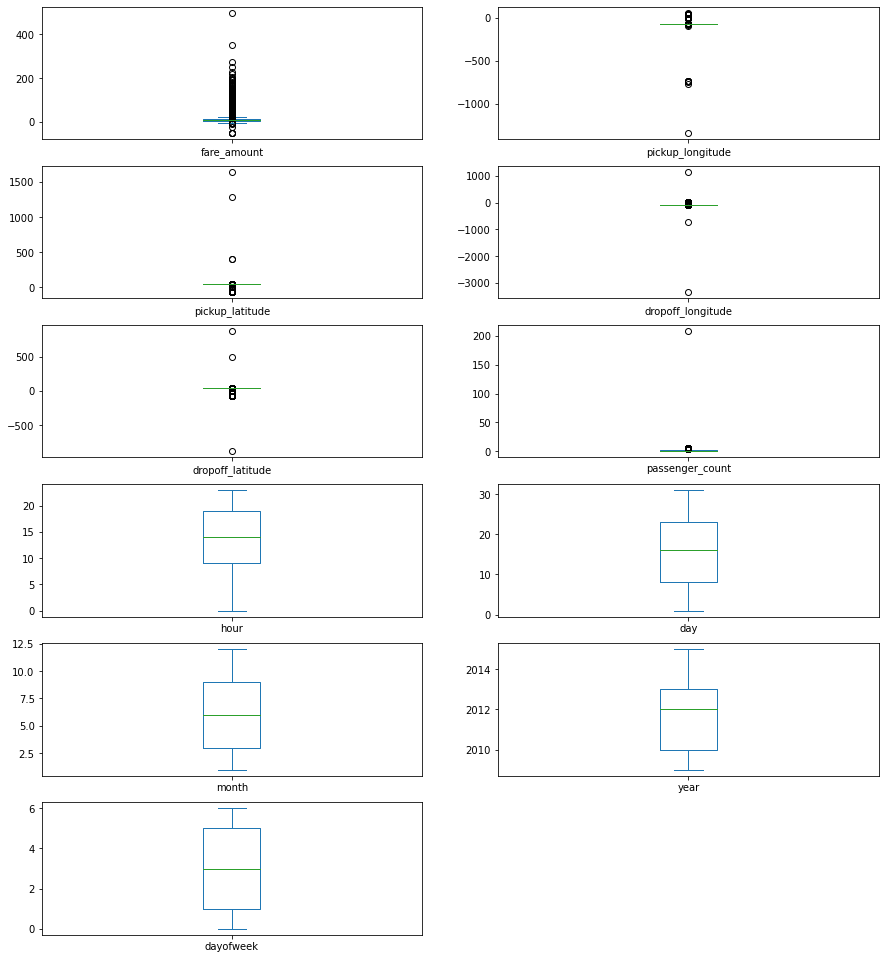

In [60]:
df.plot(kind='box', subplots=True,layout=(7,2),figsize=(15,20))

In [61]:
def remove_outliers(df,cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_w = q1 - 1.5*iqr
        upper_w = q3 + 1.5*iqr
        df[col]=df[col].clip(lower_w,upper_w)
    return df

In [62]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')

In [63]:
df = remove_outliers(df,num_cols)

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

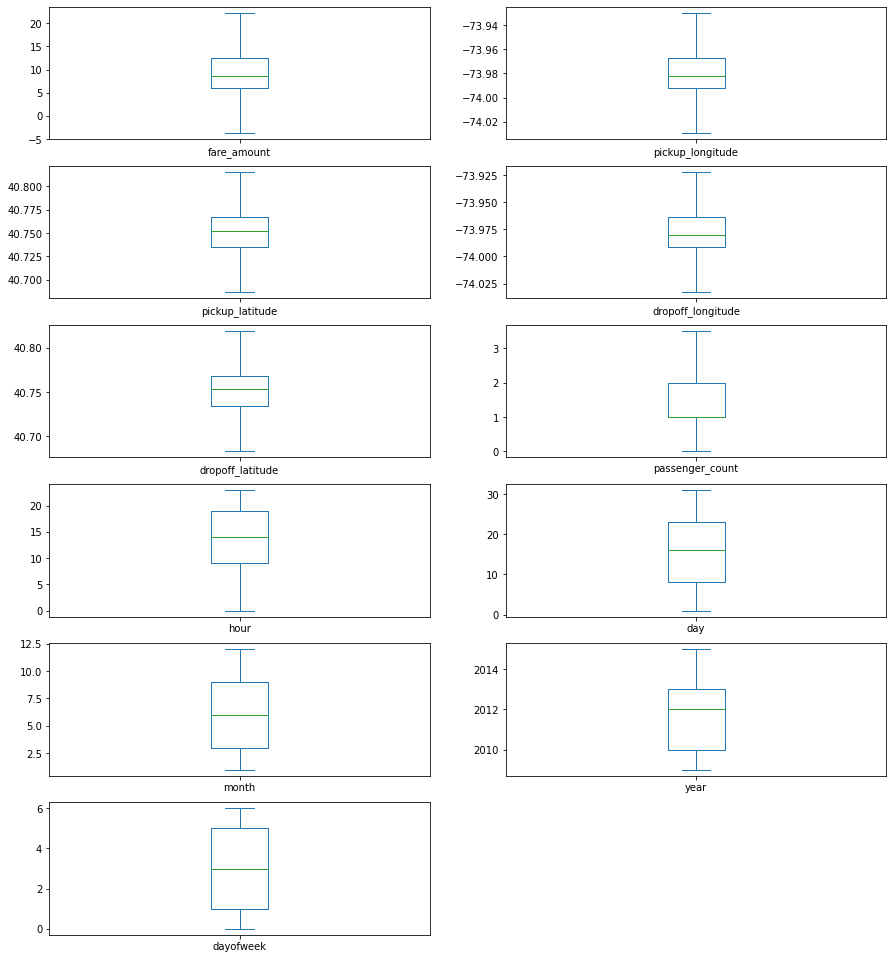

In [64]:
df.plot(kind='box', subplots=True,layout=(7,2),figsize=(15,20))

In [65]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [69]:
import haversine as hs
travel_dis=[]
for i in range(len(df['pickup_latitude'])):
    lat1  = df['pickup_latitude'][i]
    long1 = df['pickup_longitude'][i]
    lat2  = df['dropoff_latitude'][i]
    long2 = df['dropoff_longitude'][i]
    loc1 = (lat1,long1)
    loc2 = (lat2,long2)
    c = hs.haversine(loc1,loc2)
    travel_dis.append(c)
    
df['travel_dis_km'] = travel_dis
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,travel_dis_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [71]:
df   = df.loc[(df.travel_dis_km >= 1) | (df.travel_dis_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)


Remaining observastions in the dataset: (200000, 12)


In [72]:
incorrect_coordinates=df.loc[(df.pickup_latitude>90) | (df.pickup_latitude<-90)|(df.dropoff_latitude>90)|(df.dropoff_latitude<-90)|(df.pickup_longitude>180)|(df.pickup_longitude<-180)|(df.dropoff_longitude>180)|(df.dropoff_longitude<-180)]

<AxesSubplot:>

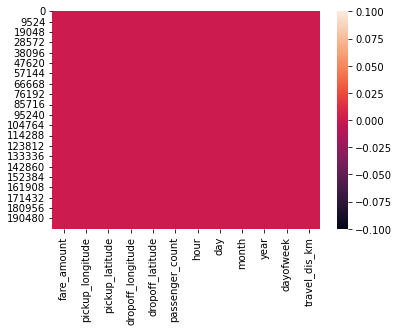

In [73]:
sns.heatmap(df.isnull())

<AxesSubplot:>

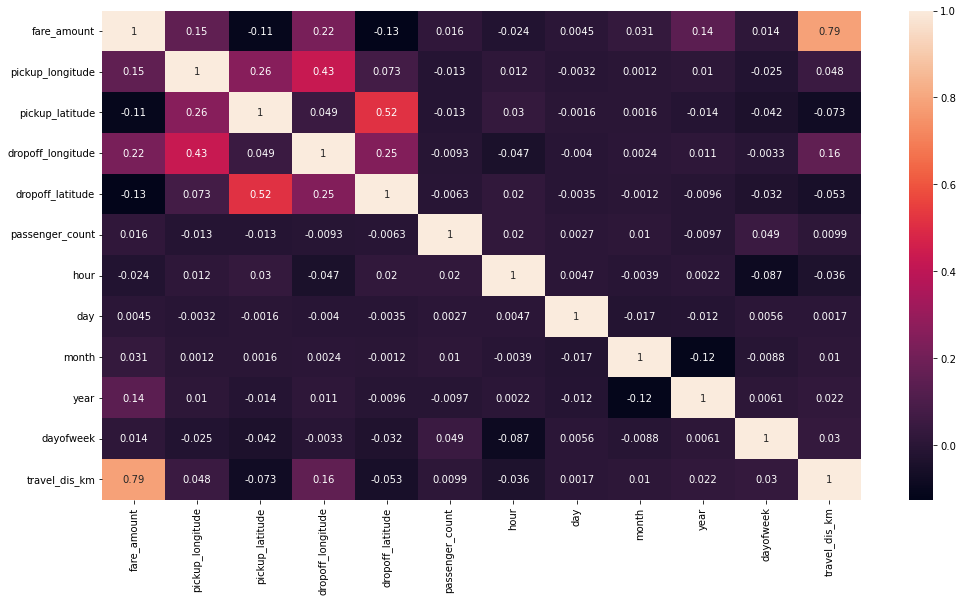

In [76]:
fig,axis=plt.subplots(figsize=(17,9))
sns.heatmap(df.corr(),annot=True)

In [78]:
x = df.drop('fare_amount',axis=1)
y = df['fare_amount']

In [84]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (160000, 11)
Shape of y_train: (160000,)


In [86]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
lr.intercept_

3651.4312720828952

In [90]:
lr.coef_

array([ 2.54819851e+01, -6.77972464e+00,  1.98818673e+01, -1.84037835e+01,
        6.10210908e-02,  6.75761530e-03,  4.15302689e-03,  5.85580862e-02,
        3.65400076e-01, -3.07443066e-02,  1.84773729e+00])

In [87]:
y_pred1 = lr.predict(X_test)

In [91]:
lr_r2 = r2_score(y_test,y_pred1)
lr_r2

0.6589516502369712

In [92]:
mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt(mse)
rmse

3.185401556238437

In [93]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [94]:
y_pred2 = rf.predict(X_test)

In [95]:
rf_r2 = r2_score(y_test,y_pred2)
rf_r2

0.7949257139315832

In [97]:
mse_rf = mean_squared_error(y_test,y_pred2)
rmse_rf = np.sqrt(mse_rf)
rmse_rf

2.4700845306108574